## Quantative Variables

In order to visualize quantative variables we can follow the following path:


quantative variable --(binning)-> categorical variable --> bar plot

**Binning(Bucketing):** A technique that groups different numerical subranges into bins(buckets). In many cases, binning turns numerical data into categorical data. 

In Python we can bin data using `pandas.cut` -> [Documentation](https://pandas.pydata.org/docs/reference/api/pandas.cut.html) 

In this notebook we will use Colombia covid data

In [4]:
import pandas as pd
import numpy as np

In [5]:
url = "http://dlsun.github.io/pods/data/covid/"

df_CO = pd.read_csv(url + "colombia_2020-05-28.csv")
df_CO

,Departamento,Edad,Sexo,Tipo,Ubicación,Estado,Fecha de inicio de síntomas,Fecha de muerte,Fecha de diagnóstico,Fecha recuperado
0,Bogotá D.C.,19,F,Importado,Recuperado,Leve,2020-02-27,- -,2020-03-06,2020-03-13
1,Valle del Cauca,34,M,Importado,Recuperado,Leve,2020-03-04,- -,2020-03-09,2020-03-19
2,Antioquia,50,F,Importado,Recuperado,Leve,2020-02-29,- -,2020-03-09,2020-03-15
3,Antioquia,55,M,Relacionado,Recuperado,Leve,2020-03-06,- -,2020-03-11,2020-03-26
4,Antioquia,25,M,Relacionado,Recuperado,Leve,2020-03-08,- -,2020-03-11,2020-03-23
...,...,...,...,...,...,...,...,...,...,...
25361,Buenaventura D.E.,48,M,En estudio,Hospital,Moderado,2020-05-12,- -,2020-05-28,NaN
25362,Valle del Cauca,55,F,En estudio,Casa,Leve,2020-05-21,/ /,2020-05-28,NaN
25363,Buenaventura D.E.,39,F,En estudio,Casa,Leve,2020-05-23,/ /,2020-05-28,NaN
25364,Valle del Cauca,13,F,En estudio,Casa,Leve,2020-05-13,/ /,2020-05-28,NaN


In [6]:
df_CO["age"] = pd.cut(
    df_CO["Edad"], # Edad means age
    bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 120],
    labels=["0-9", "10-19", "20-29", "30-39", "40-49", "50-59", "60-69", "70-79", "80+"],
    right=False
)

df_CO["age"]

0        10-19
1        30-39
2        50-59
3        50-59
4        20-29
         ...  
25361    40-49
25362    50-59
25363    30-39
25364    10-19
25365      0-9
Name: age, Length: 25366, dtype: category
Categories (9, object): ['0-9' < '10-19' < '20-29' < '30-39' ... '50-59' < '60-69' < '70-79' < '80+']

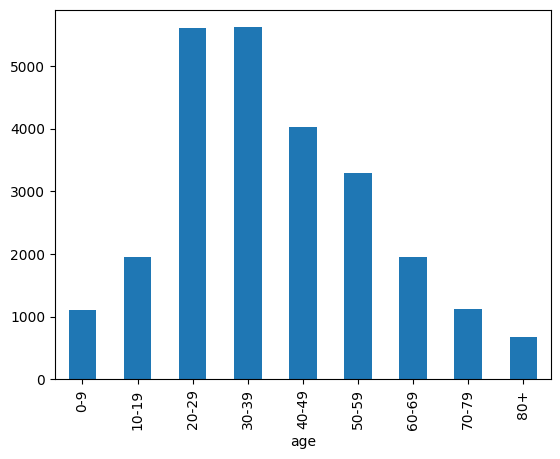

In [7]:
manual_histogram = df_CO["age"].value_counts(sort=False).plot.bar()

In this exercise we se have seen the idea behind a visualization called **histogram**.

Pandas provides a built-in method for constructing histograms:
`Series.plot.hist()`

| Histogram | Bar Plot |
|------|---------------|
| Used for **quantitative (numerical) data** | Used for **categorical data** |
| Shows the distribution of continuous data | Shows the frequency or comparison of categories |
| The x-axis represents numeric ranges(bins - buckets) | The x-axis represents categories |
| The y-axis shows the frequenct (count) of values within each range | The y-axis shows the count (or mean, etc.) for each category |
| Bars touch each other, because the numeric intervals are continuous | Bars are seperated, because categories are independent |

<Axes: ylabel='Frequency'>

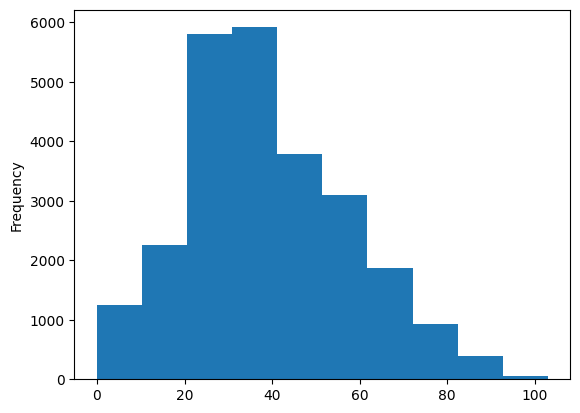

In [8]:
df_CO["Edad"].plot.hist()

### Numerical Data Distributions

To visualize how numerical data is distributed we can use `Series.plot.hist()` with `density=True`. "density" property changes y-axis and make it show pdf(probablity density function).

- Recall that sum of distributions should be equal to 1.0

<Axes: ylabel='Frequency'>

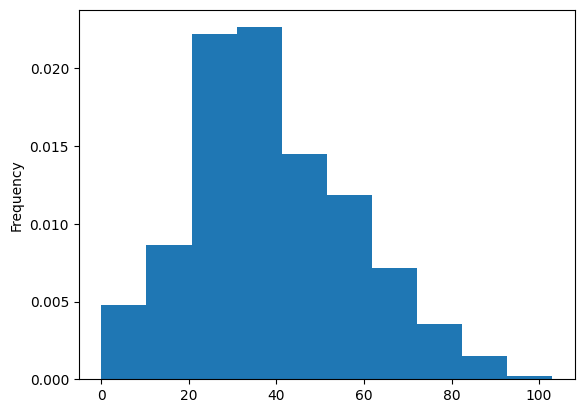

In [9]:
df_CO["Edad"].plot.hist(density=True)

### Summarizing a Quantitative Variable

#### Summary of Center:

- One summary of the center of a quantative variable is **the mean**. In Python we can calculat it manually by `series.sum() / len(series)` or automaticall with `series.mean()`

  <img src="https://www.inchcalculator.com/wp-content/uploads/2022/11/mean-formula.png" width="400">

- Another summary of center is the **median**, whis is the "middle" of the *sorted* values. We can get median value automaticall with `series.median()`

**Order Statistics:** Sorted values in statistics science. 



In [10]:
print(f"Mean of ages: {df_CO["Edad"].mean()}")
print(f"Median of ages: {df_CO["Edad"].median()}")

Mean of ages: 39.04742568792872
Median of ages: 37.0


#### Summary of Spread:
- **Variance:** A statistic that measures how much the values in a dataset spread around the mean.
| Large variance | Small variance |
|------|---------------|
| The data is spread out far from the mean | The data is concentrated around the mean |
| Small The data is more consistent/homogeneous | The data is more variable/heteregeneous |
- Variance is affected by outliers.
- Very large deviations increase the variance.

  <img src="https://images.ctfassets.net/pdf29us7flmy/4UEXUFiVFUgsNA9fZOOQf2/b9e09d7447df4f0253a145ad853eb883/resized.png?w=720&q=100&fm=jpg" width="400">


- The unit of a variance is (actual unit) ^ 2. To solve this we take the square root to get the standart deviation.
- **Standart Deviation:** A statistic that measures how much the values in a dataset deviate from the mean, just like variance, but in the same units as the original data.
| Large SD | Small SD |
|------|---------------|
| Data points are more spread out from the mean. | The data points are close to the mean, less spread out. |

- Like variancei SD is sensitive to outliers.
- Extreme values increase the SD.
  
  <img src="https://www.standarddeviationcalculator.io/storage/2023/Mar/standarddeviationformula_8_900xauto.png" width="400">


In [11]:
# Manual calculation of variance

(((df_CO["Edad"] - df_CO["Edad"].mean()) ** 2).sum() / (len(df_CO) - 1))

np.float64(348.0870469898451)

In [12]:
# Automatic calculation of variance

df_CO["Edad"].var()

np.float64(348.0870469898451)

In [13]:
# Automatic calculation of Standart Deviation

df_CO["Edad"].std()

np.float64(18.65709106452142)